## Online Shoppers Purchasing Intention

The goal of this project is to design a machine learning classification system that is able to predict the purchasing intention (make a purchase or not) of a visitor to a store's website.


# Introduction Points:

1.Rising Trend of Online Shopping: Highlight the growing preference for online shopping over physical stores due to its convenience and ability to bargain shop from home or office.

2.Convenience and Access to Variety: Emphasize how online shopping platforms provide a wide range of products accessible to consumers with just an internet connection and digital payment method.

3.Information Accessibility: Discuss how consumers can access detailed product information and reviews from other users, eliminating the need to rely solely on friends and family for recommendations.

4.Advantages of Online Shopping: Enumerate the advantages such as time and energy savings, 24/7 availability, and the ability to compare prices easily.

5.Global Reach: Mention the significant global reach of online shopping, with an estimated 1.8 billion people worldwide purchasing goods online in 2018.

6.Objective of the Study: Outline the objective of the analysis, which is to analyze the factors influencing online shopper intention and predict purchasing decisions.

7.Dataset Description: Provide a brief overview of the dataset used in the analysis, focusing on how it captures online shoppers' behavior and factors influencing purchase decisions.

8.Classification Methods: Introduce the three classification methods employed in the study: binary logistic regression, decision tree, and random forest.

9.Performance Evaluation: Explain that the performance of these classification algorithms will be compared using accuracy as the metric.



### Data Understanding

The data used in this analysis is an Online Shoppers Purchasing Intention data set provided from an ecommerce site. The data set was formed so that each session would belong to a different user in a 1-year period to avoid any tendency to a specific campaign, special day, user profile, or period.

The Dataset contains 12,330 records and 18 features (17 input and 1 output variable) with details as shown below:

**Input Variables:**

1. Administrative: This is the number of pages of this type (administrative) that the user visited.
2. Administrative_Duration: This is the amount of time spent in this category of pages.
3. Informational: This is the number of pages of this type (informational) that the user visited.
4. Informational_Duration: This is the amount of time spent in this category of pages.
5. ProductRelated: This is the number of pages of this type (product related) that the user visited.
6. ProductRelated_Duration: This is the amount of time spent in this category of pages.
7. BounceRates: The percentage of visitors who enter the website through that page and exit without triggering any additional tasks.
8. ExitRates: The percentage of pageviews on the website that end at that specific page.
9. PageValues: The average value of the page averaged over the value of the target page and/or the completion of an eCommerce transaction.
10. SpecialDay: This value represents the closeness of the browsing date to special days or holidays (eg Mother's Day or Valentine's day) in which the transaction is more likely to be finalized. More information about how this value is calculated below.
11. Month: Contains the month the pageview occurred, in string form.
12. OperatingSystems: An integer value representing the operating system that the user was on when viewing the page.
13. Browser: An integer value representing the browser that the user was using to view the page.
14. Region: An integer value representing which region the user is located in.
15. TrafficType: An integer value representing what type of traffic the user is categorized into.
16. VisitorType: A string representing whether a visitor is New Visitor, Returning Visitor, or Other.
17. Weekend: A boolean representing whether the session is on a weekend.

**Output variable:**

1. Revenue: A boolean representing whether or not the user completed the purchase.

### Libraries import

In [41]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler

from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

### Data Inspection

In [42]:
# Import Dataset
data = pd.read_csv('online_shoppers_intention.csv')
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [43]:
# Check shape
data.shape

(12330, 18)

***Dataset contains 12,330 records and 18 features.***

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

***There are 2 Boolean, 2 Categorical and 14 Numeric Variables (7 Integers and 7 Float) in the dataset.***

In [45]:
data.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

***There are no missing values in the dataset***

In [46]:
data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


* ***On average, users visit 2 Administrative pages and 31 Product Related Pages. However, there is very little to no engagement with the Informational pages.***

In [47]:
data.describe(include=['object', 'bool'])

,Month,VisitorType,Weekend,Revenue
count,12330,12330,12330,12330
unique,10,3,2,2
top,May,Returning_Visitor,False,False
freq,3364,10551,9462,10422


* ***Dataset contains records of 10 unique months; May occurs most frequently.***
* ***There are 3 unique Visitor Types with returning visitor being the most common type; occuring 10,551 instances.***

### Exploratory Data Analysis

### Correlation Analysis

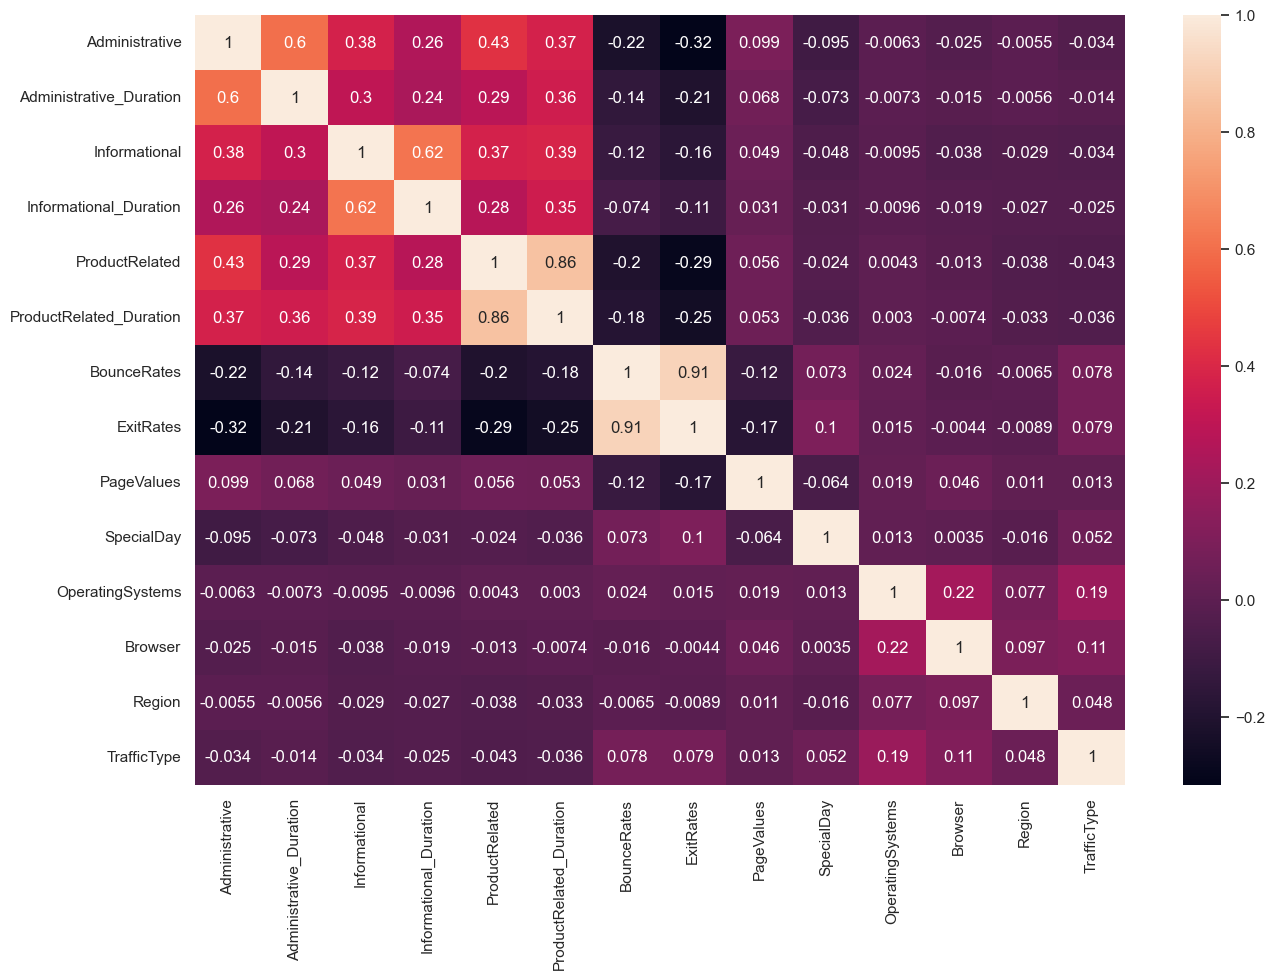

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns


numeric_data = data.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(15,10))
sns.heatmap(numeric_data.corr(), annot=True)
plt.show()


***The Heatmap shows there is little correlation among the different features with the exception of the following:***

- High correlation between:

        - BounceRates & ExitRates (0.91). 
        - ProductRelated & ProductRelated_Duration (0.86).
- Moderate Correlations:

        - Administrative & Administrative DUration (0.6)
        - Informational and Informational Duration (0.62)
        - Page Values and Revenue (0.49)

### Page Metrics Analysis
* Bounce Rates
* Exit Rates
* Page Values

<Axes: xlabel='Page Values', ylabel='Density'>

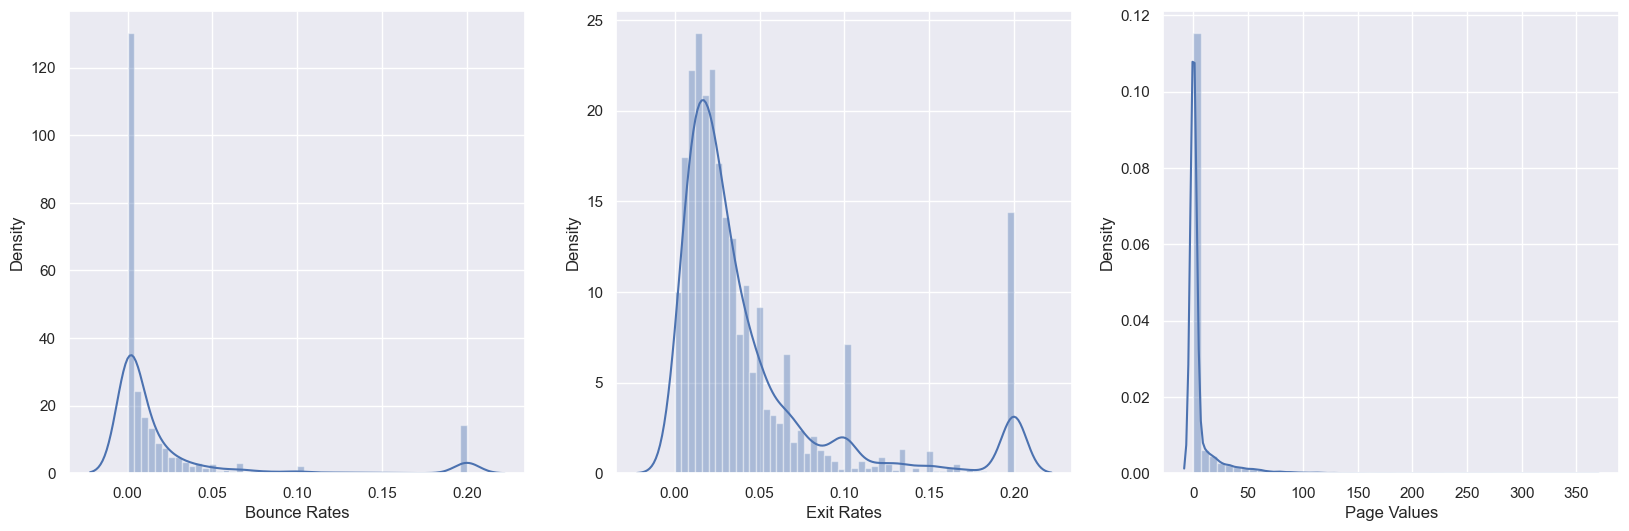

In [51]:
fig,axes = plt.subplots(1,3, figsize=(20,6))

sns.distplot(ax=axes[0], x=data['BounceRates'], axlabel='Bounce Rates')
sns.distplot(ax=axes[1], x=data['ExitRates'], axlabel='Exit Rates')
sns.distplot(ax=axes[2], x=data['PageValues'], axlabel='Page Values')

#plt.tight_layout()
#plt.show()

The above distribution plots of Page Metrics show the following:

* All 3 features have distributions that are right skewed with a lot of outliers.
* The average bounce rate of most of our data points is low. This is a positive observation as high rates would identicate that visitors are not engaging with the website.
* Exit rates are higher in values than bounce rates. This is expected as we can assume that transaction confirmation pages will cause the average exit rate to increase.

### Revenue Analysis

### Distribution of Target feature (Revenue)

In [52]:
data.Revenue.value_counts()

Revenue
False    10422
True      1908
Name: count, dtype: int64

In [53]:
revenue_ratio = data.Revenue.value_counts(normalize=True)
revenue_ratio

Revenue
False    0.845255
True     0.154745
Name: proportion, dtype: float64

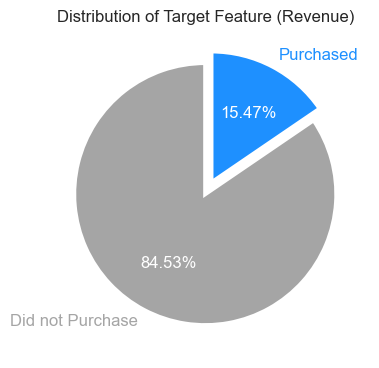

In [54]:
fig, ax = plt.subplots(figsize=(4, 4))

x=revenue_ratio

cmap = plt.get_cmap('Greys')
colors = list(cmap(np.linspace(0.45, len(x))))

colors[1]='dodgerblue'
labels = ['Did not Purchase','Purchased']

patches, texts, pcts = ax.pie(
    x, labels=labels, autopct='%.2f%%',
    wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
    textprops={'size': 'medium'},
    startangle=90,
    colors=colors,
    explode=(0, 0.1))

for i, patch in enumerate(patches):
   texts[i].set_color(patch.get_facecolor())
plt.setp(pcts, color='white')
plt.setp(texts, fontweight=300)
ax.set_title('Distribution of Target Feature (Revenue)', fontsize=12)
plt.tight_layout()

***There is imbalance in the output variable ('Revenue'), where the proportion of visitors who did not make a purchase to those that completed a purchase is 84.53% to 15.47% respectively.***

### Revenue by Visitor Type

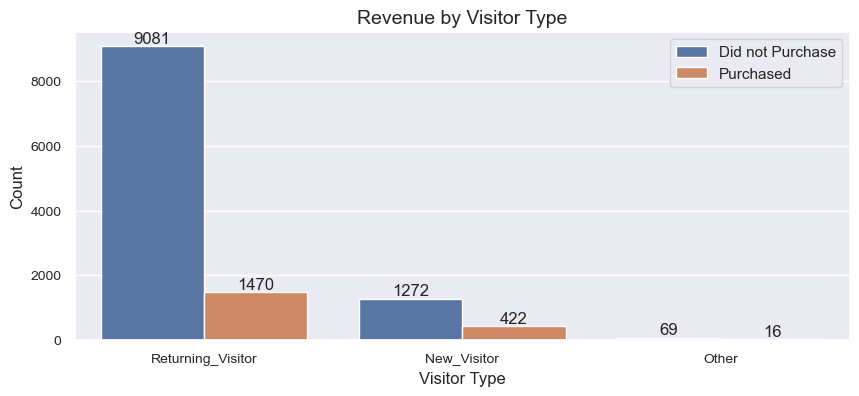

In [55]:
plt.figure(figsize=(10,4))
plt.title("Revenue by Visitor Type", fontsize=14)
ax = sns.countplot(x='VisitorType', data=data, hue = 'Revenue')
ax.legend(labels=['Did not Purchase','Purchased'])
for i in ax.containers:
    ax.bar_label(i)
plt.xlabel("Visitor Type", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

### Revenue by Month

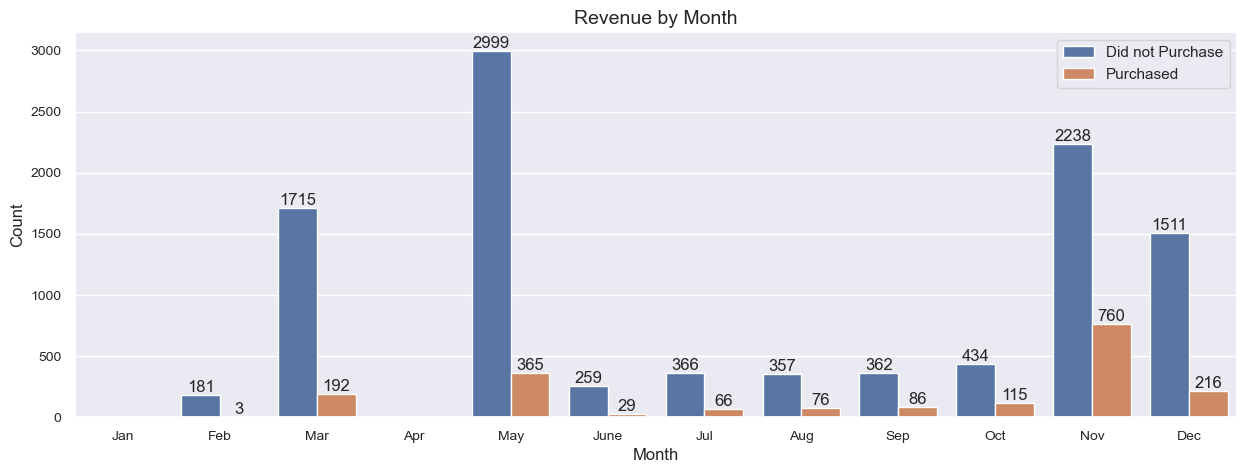

In [56]:
plt.figure(figsize=(15,5))
plt.title("Revenue by Month", fontsize=14)

orderlist = ['Jan','Feb','Mar','Apr','May','June','Jul','Aug','Sep','Oct','Nov','Dec']

ax = sns.countplot(x='Month', data=data, hue = 'Revenue', order=orderlist)
ax.legend(labels=['Did not Purchase','Purchased'])
for i in ax.containers:
    ax.bar_label(i)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

* ***In January and April, there were no website visits recorded.***
* ***A lot of transactions happen towards the end of the year, with November and December recording the highest and third-highest Revenue generated. Although, these months do not have the highest website visits recorded.***
* ***The top four (4) months with the most visits are May, November, March and December.***

### Revenue by Special Day

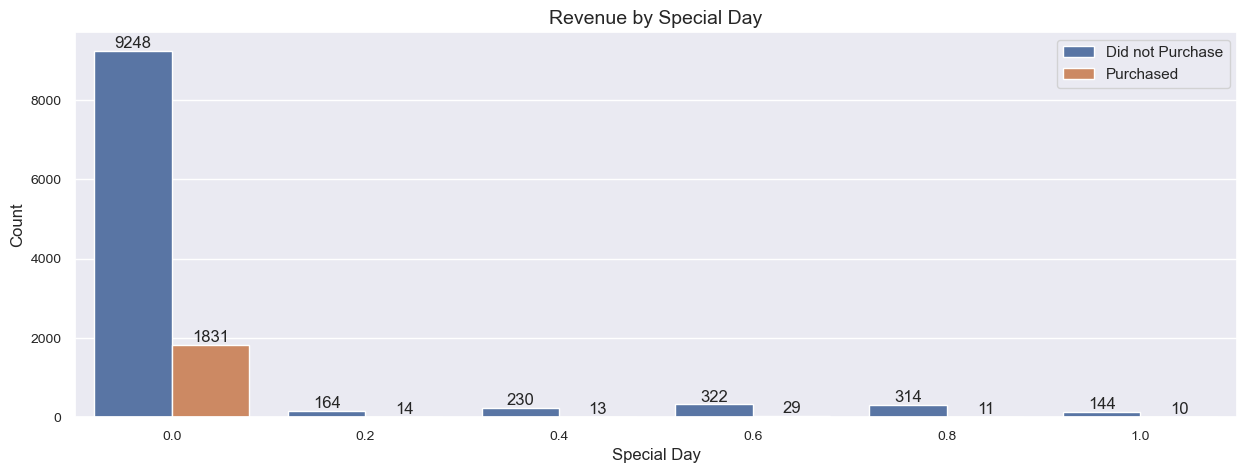

In [57]:
plt.figure(figsize=(15,5))
plt.title("Revenue by Special Day", fontsize=14)

ax = sns.countplot(x='SpecialDay', data=data, hue = 'Revenue')
ax.legend(labels=['Did not Purchase','Purchased'])
for i in ax.containers:
    ax.bar_label(i)
plt.xlabel("Special Day", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

* ***There were significantly more website visitors and revenue generated (Completed purchases) on Special Day 0.0 in comparison to the other special days.***

### Revenue by Page Type / Duration

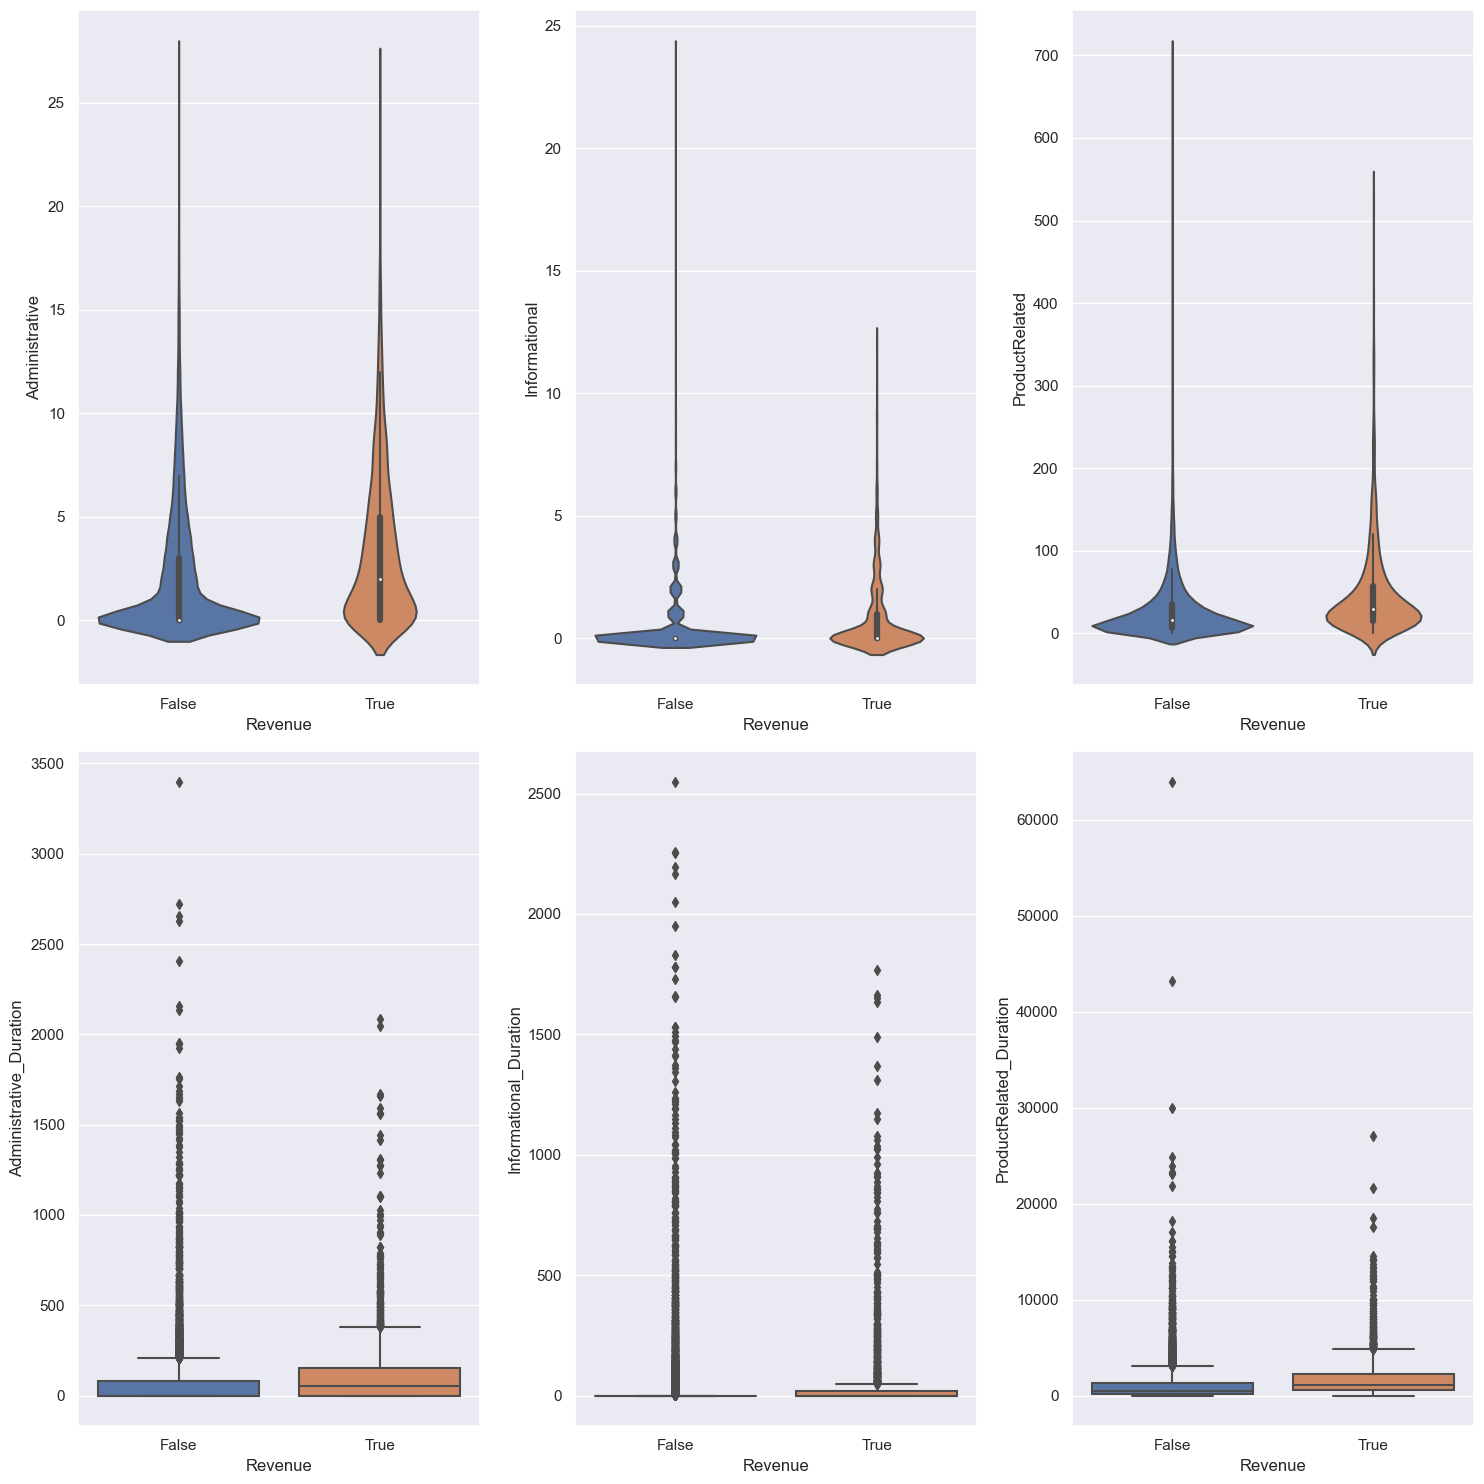

In [58]:
fig = plt.figure(figsize=(15, 15))

ax1 = fig.add_subplot(2, 3, 1)
ax2 = fig.add_subplot(2, 3, 2)
ax3 = fig.add_subplot(2, 3, 3)
ax4 = fig.add_subplot(2, 3, 4)
ax5 = fig.add_subplot(2, 3, 5)
ax6 = fig.add_subplot(2, 3, 6)

sns.violinplot(data=data, x = 'Revenue', y = 'Administrative', ax=ax1)
sns.violinplot(data=data, x = 'Revenue', y = 'Informational', ax=ax2)
sns.violinplot(data=data, x = 'Revenue', y = 'ProductRelated', ax=ax3)
sns.boxplot(data=data, x = 'Revenue', y = 'Administrative_Duration', ax=ax4)
sns.boxplot(data=data, x = 'Revenue', y = 'Informational_Duration', ax=ax5)
sns.boxplot(data=data, x = 'Revenue', y = 'ProductRelated_Duration', ax=ax6)

plt.tight_layout()
plt.show()

* ***Visitors tend to visit less pages, and spend less time, if they are not going to make a purchase.***
* ***The number of product related pages visited and time spent on them is more than that for account related or informational pages.***

## Data Pre-Processing

In this section we will make our data ready for model training. 

* Encode Categorical features using dummy encoding
* Encode Boolean variables using label encoder
* Split Data into train and test set
* Scale train set using the standard scaler

In [59]:
# Encode categorical features (Month, Visitor Type) using dummy encoding

categorical = ['Month', 'VisitorType']

encoded_features = pd.get_dummies(data[categorical])
encoded_features.head(3)

,Month_Aug,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,False,False,True,False,False,False,False,False,False,False,False,False,True
1,False,False,True,False,False,False,False,False,False,False,False,False,True
2,False,False,True,False,False,False,False,False,False,False,False,False,True


In [60]:
#Concactenante encoded features to dataset and drop non-encoded variables

data = pd.concat([data, encoded_features], axis=1)

data.drop(categorical, axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Administrative                 12330 non-null  int64  
 1   Administrative_Duration        12330 non-null  float64
 2   Informational                  12330 non-null  int64  
 3   Informational_Duration         12330 non-null  float64
 4   ProductRelated                 12330 non-null  int64  
 5   ProductRelated_Duration        12330 non-null  float64
 6   BounceRates                    12330 non-null  float64
 7   ExitRates                      12330 non-null  float64
 8   PageValues                     12330 non-null  float64
 9   SpecialDay                     12330 non-null  float64
 10  OperatingSystems               12330 non-null  int64  
 11  Browser                        12330 non-null  int64  
 12  Region                         12330 non-null 

In [61]:
# Encode Boolean variables using label Encoder

le = LabelEncoder()

data['Revenue'] = le.fit_transform(data['Revenue'])
data['Weekend'] = le.fit_transform(data['Weekend'])

print(data.Revenue.value_counts())
print(data.Weekend.value_counts())

Revenue
0    10422
1     1908
Name: count, dtype: int64
Weekend
0    9462
1    2868
Name: count, dtype: int64


### Select Target and Features

In [62]:
y = data['Revenue']
X = data.drop('Revenue', axis=1)

In [63]:
#Split Dataset into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [64]:
#Scale train set using Standard scaler

scaler =RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, index=X_train.index, columns = X_train.columns)

X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, index=X_test.index, columns = X_test.columns)

In [65]:
X_train_scaled.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
4060,0.75,1.323055,0.0,0.0,2.161290,1.308039,0.014629,-0.318851,0.000000,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5871,0.25,0.021513,0.0,0.0,1.322581,0.136747,-0.169279,-0.487991,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10775,0.50,1.774232,0.0,0.0,-0.129032,0.222479,-0.169279,0.099427,52.741776,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
673,-0.25,-0.096809,0.0,0.0,0.032258,-0.084853,0.497388,-0.355727,0.000000,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6440,-0.25,-0.096809,0.0,0.0,-0.516129,-0.440269,-0.169279,1.159979,21.478995,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


### Modelling

* Train and evaluate models. Predictive models that will be used are Logistic Regression, KNeighbors Classifier, SVM, Decision Tree and Random Forest Classifier.
* The Scaled Dataset would be used for :- Logistic Regression, KNN and SVM.
* The Unscaled Dataset would be used for :- Decision Tree and Random Forest Classifier.
* Hyperparameter Tuning for the model with the best performance to try to improve its performance further.
* Inspect Feature importance (Top 10 features)
* Evaluate with Cross Validation.


In [34]:
# Initialize models

LR = LogisticRegression()
SV = SVC()
DC = DecisionTreeClassifier()
RF = RandomForestClassifier()

In [66]:
def c_matrix_plot(y_test,prediction):

    c_matrix = confusion_matrix(y_test,prediction)
    group_names = ['True Positive', 'False Negative', 'False Positive', 'True Negative']
    group_counts = ["{0:0.0f}".format(value) for value in
                    c_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         c_matrix.flatten()/np.sum(c_matrix)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    
    ax = sns.heatmap(c_matrix, annot=labels, fmt='', cmap='Greens')

   # ax.set_title(f'Confusion Matix for {prediction.__class__.__name__}');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');

    ax.xaxis.set_ticklabels(['Did not purchase', 'Purchased'])
    ax.yaxis.set_ticklabels(['Did not purchase', 'Purchased'])

    plt.show()


For Logistic Regression, Accuracy score is  0.8861854555285212
              precision    recall  f1-score   support

           0       0.89      0.98      0.94      3127
           1       0.78      0.37      0.50       572

    accuracy                           0.89      3699
   macro avg       0.84      0.68      0.72      3699
weighted avg       0.88      0.89      0.87      3699

[[3066   61]
 [ 360  212]]

	Confusion Matrix for Logistic Regression


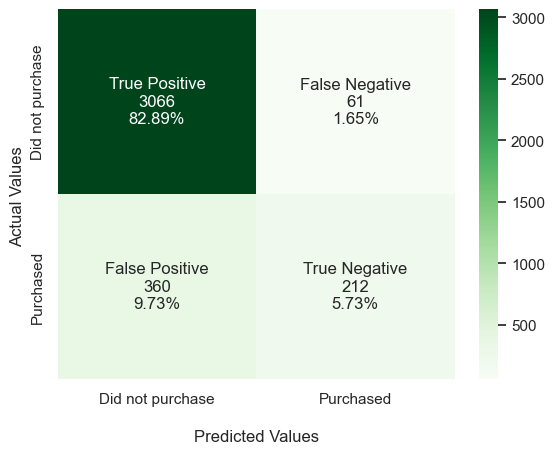


For SVM, Accuracy score is  0.8983509056501757
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      3127
           1       0.78      0.48      0.59       572

    accuracy                           0.90      3699
   macro avg       0.85      0.73      0.77      3699
weighted avg       0.89      0.90      0.89      3699

[[3051   76]
 [ 300  272]]

	Confusion Matrix for SVM


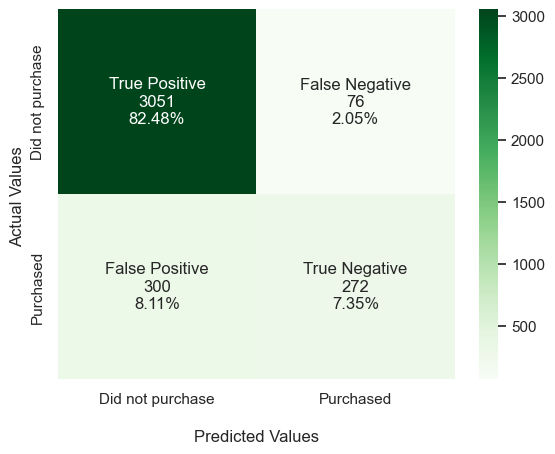

In [67]:
# For Logistic Regression, KNN and SVM, we will use the scaled dataset

LR = LogisticRegression()
LR = LR.fit(X_train_scaled, y_train) 
LR_preds = LR.predict(X_test_scaled) 
print('\nFor Logistic Regression, Accuracy score is ', accuracy_score(y_test,LR_preds))
print(classification_report(y_test, LR_preds))
print(confusion_matrix(y_test, LR_preds))
print('\n\tConfusion Matrix for Logistic Regression')
c_matrix_plot(y_test, LR_preds)



SV = SVC()
SV = SV.fit(X_train_scaled, y_train) 
SV_preds = SV.predict(X_test_scaled) 
print('\nFor SVM, Accuracy score is ', accuracy_score(y_test,SV_preds))
print(classification_report(y_test, SV_preds))
print(confusion_matrix(y_test, SV_preds))
print('\n\tConfusion Matrix for SVM')
c_matrix_plot(y_test, SV_preds)


For Decision Tree Classifier, Accuracy score is  0.8726682887266829
              precision    recall  f1-score   support

           0       0.92      0.93      0.92      3127
           1       0.59      0.58      0.58       572

    accuracy                           0.87      3699
   macro avg       0.76      0.75      0.75      3699
weighted avg       0.87      0.87      0.87      3699

[[2898  229]
 [ 242  330]]

	Confusion Matrix for Decision Tree


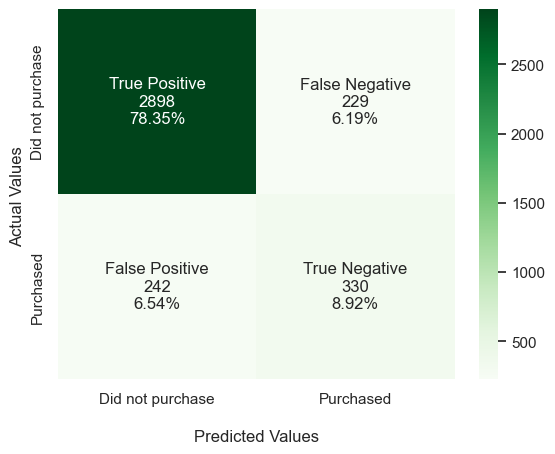


For Random Forest Classifier, Accuracy score is  0.9061908623952419
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      3127
           1       0.77      0.56      0.65       572

    accuracy                           0.91      3699
   macro avg       0.85      0.76      0.80      3699
weighted avg       0.90      0.91      0.90      3699

[[3033   94]
 [ 253  319]]

	Confusion Matrix for Random Forest


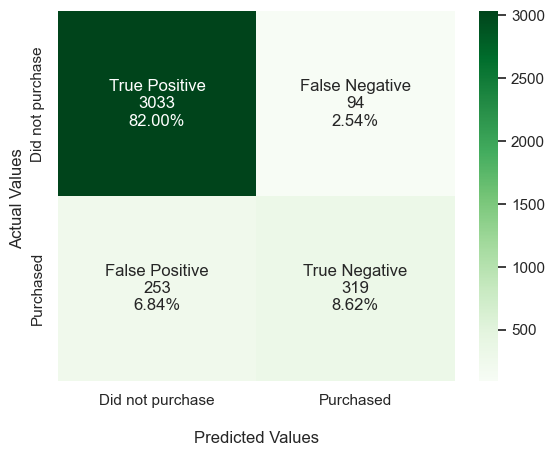

In [68]:
# For Decision Tree Classifier and Random Forest, we will use the unscaled dataset to train the models

DC = DecisionTreeClassifier()
DC = DC.fit(X_train, y_train) 
DC_preds = DC.predict(X_test) 
print('\nFor Decision Tree Classifier, Accuracy score is ', accuracy_score(y_test,DC_preds))
print(classification_report(y_test,DC_preds))
print(confusion_matrix(y_test,DC_preds))
print('\n\tConfusion Matrix for Decision Tree')
c_matrix_plot(y_test,DC_preds)

RF = RandomForestClassifier()
RF = RF.fit(X_train, y_train) 
RF_preds = RF.predict(X_test) 
print('\nFor Random Forest Classifier, Accuracy score is ', accuracy_score(y_test,RF_preds))
print(classification_report(y_test,RF_preds))
print(confusion_matrix(y_test,RF_preds))
print('\n\tConfusion Matrix for Random Forest')
c_matrix_plot(y_test,RF_preds)

### ROC Curves

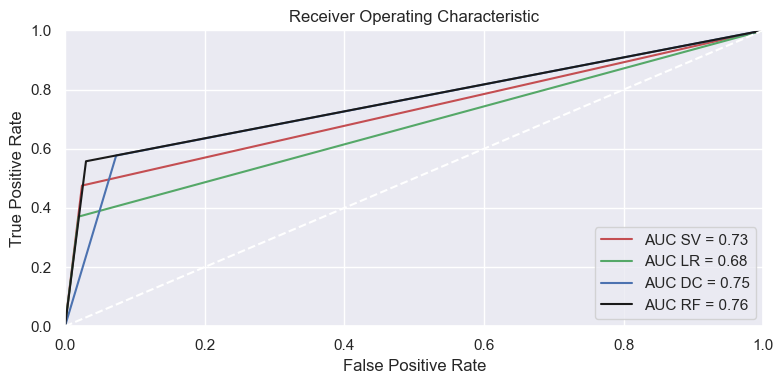

In [69]:
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

fpr_sv, tpr_sv, threshold_sv = metrics.roc_curve(y_test, SV_preds)
roc_auc_sv = metrics.auc(fpr_sv, tpr_sv)
fpr_lr, tpr_lr, threshold_lr = metrics.roc_curve(y_test, LR_preds)
roc_auc_lr = metrics.auc(fpr_lr, tpr_lr)
fpr_dc, tpr_dc, threshold_dc = metrics.roc_curve(y_test, DC_preds)
roc_auc_dc = metrics.auc(fpr_dc, tpr_dc)
fpr_rf, tpr_rf, threshold_rf = metrics.roc_curve(y_test, RF_preds)
roc_auc_rf = metrics.auc(fpr_rf, tpr_rf)

fig = plt.figure(figsize=(8, 4))
plt.title('Receiver Operating Characteristic')

plt.plot(fpr_sv, tpr_sv, 'r', label = 'AUC SV = %0.2f' % roc_auc_sv)
plt.plot(fpr_lr, tpr_lr, 'g', label = 'AUC LR = %0.2f' % roc_auc_lr)
plt.plot(fpr_dc, tpr_dc, 'b', label = 'AUC DC = %0.2f' % roc_auc_dc)
plt.plot(fpr_rf, tpr_rf, 'k', label = 'AUC RF = %0.2f' % roc_auc_rf)

plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'w--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.tight_layout()
plt.show()

### Conclusion
* In this project, we trained models that can classify visitors to a store's website, and predict if they are likely to make a purchase on the website or not. 
* Five (5) learning classifiers (Logistic Regression, SVM, Decision Tree and Random Forest) were tested. 
* The Random Forest Classifier had the best performance with an accuracy of 90% and F-1 Score of 62%.
* The Page Values Feature was found to be the most important feature in determining the purchase intention of a website visitor. Other important features include the Exit rate, Bounce rate, type of pages visited as well as the duration spent on the pages.